In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [138]:
path = '/home/sergei/'
image = cv2.imread(path + 'img1.jpg', 0)

In [139]:
image

array([[231, 233, 234, ..., 221, 221, 219],
       [230, 231, 233, ..., 226, 226, 224],
       [228, 229, 231, ..., 227, 228, 226],
       ...,
       [207, 207, 206, ..., 197, 198, 199],
       [208, 207, 206, ..., 195, 197, 198],
       [211, 210, 208, ..., 196, 196, 196]], dtype=uint8)

# Осуществить выделение контуров на входном изображении методом простого градиента.

In [172]:
def grad(image):
    shape = image.shape
    result = image.copy()
    result[1:, 1:] = ((image[1:, 1:] - image[1:, :shape[1] - 1]) ** 2 + (image[1:, 1:] - image[:shape[0] - 1, 1:]) ** 2) 
    result[0, :] = result[1, :]
    result[:, 0] = result[:, 1]
    result = result ** 0.5
    
    return np.around(result).astype('uint8')

def grad_iter(image):
    shape = image.shape
    result = image.copy()
    for i in range(1, shape[0]):
        for j in range(1, shape[1]):
            result[i, j] = np.abs((image[i, j] - image[i - 1, j]))
            result[i, j] += np.abs(image[i, j] - image[i, j - 1])
            result = result
    return np.around(result)
            

In [173]:
image_grad = grad(image)

In [174]:
cv2.imwrite(path + 'grad.jpg', image_grad)

True

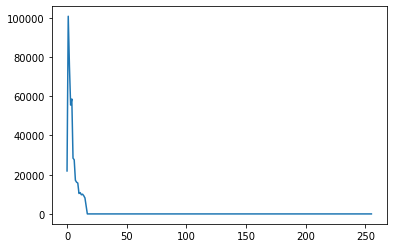

In [175]:
hist = cv2.calcHist([image_grad], [0], None, [256], [0, 256])
plt.plot(hist)

In [176]:
image_grad_threshold = image_grad.copy()
image_grad_threshold[image_grad < 8] = 0
image_grad_threshold[image_grad >= 8] = 255

In [177]:
cv2.imwrite(path + 'grad_threshold.jpg', image_grad_threshold)

True

# Осуществить выделение контуров методами, указанными в задании.

# Оператор Собела

In [220]:
def sobel(image):
    shape = image.shape
    result = image.copy()
    for i in range(1, shape[0] - 1):
        for j in range(1, shape[1] - 1):
            result[i, j] = np.abs(image[i + 1, j - 1] + 2 * image[i + 1, j] + image[i + 1, j + 1] - image[i - 1, j - 1] - 2 * image[i - 1, j] - image[i - 1, j + 1])
            result[i, j] += np.abs((image[i - 1, j + 1] + 2 * image[i, j + 1] + image[i + 1, j + 1] - image[i - 1, j - 1] - 2 * image[i, j - 1] - image[i + 1, j - 1]))
            result = result
    return np.around(result)

def sobel_i(image):
    shape = image.shape
    result = image.copy()
    result[1:-1, 1:-1] = np.power((image[2:, :shape[1] - 2] + 2 * image[2:, 1:shape[1] - 1] + image[2:, 2:] - image[:shape[0] - 2, :shape[1] - 2] - 2 * image[:shape[0] - 2, 1:shape[1] - 1] - image[:shape[0] - 2, 2:]), 2)
    result[1:-1, 1:-1] += np.power(((image[:shape[0] - 2, 2:] + 2 * image[1:shape[0] - 1, 2:] + image[2:shape[0], 2:] - image[:shape[0] - 2, :shape[1] - 2] - 2 * image[1:shape[0] - 1, :shape[1] - 2] - image[2:shape[0], :shape[1] - 2])), 2)
    result[1:-1, 1:-1] = np.sqrt(result[1:-1, 1:-1])
    
    return np.around(result).astype('uint8')

In [221]:
sobel_image = sobel_i(image)

In [222]:
cv2.imwrite(path + 'sobel.jpg', sobel_image)

True

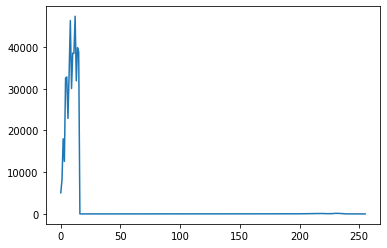

In [223]:
hist = cv2.calcHist([sobel_image], [0], None, [256], [0, 256])
plt.plot(hist)

In [208]:
image_sobel_threshold = sobel_image.copy()
image_sobel_threshold[sobel_image < 20] = 0
image_sobel_threshold[sobel_image >= 20] = 255

In [209]:
cv2.imwrite(path + 'sobel_threshold.jpg', image_sobel_threshold)

True